### I.가장 먼 노드
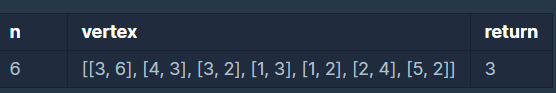

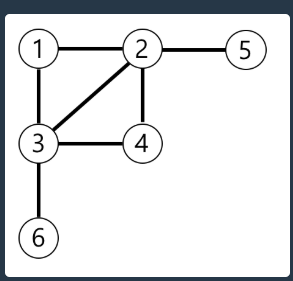

In [2]:
from heapq import heappush, heappop

INF = 1e9

def dijkstra(n,graph):
    queue, distance = [], [INF]*(n+1)
    distance[1] = 0
    heappush(queue,(0,1))
    while queue:
        cost, pos = heappop(queue)
        for p,c in graph[pos]:
            c += cost
            if distance[p] > c:
                distance[p] = c
                heappush(queue,(c,p))
    return distance[1:]
    
def solution(n, edge):
    Graph = [[] for _ in range(n+1)]
    for s,e in edge:
        Graph[s].append((e,1))
        Graph[e].append((s,1))
    result = dijkstra(n,Graph)
    print(result)
    MAX = max(result)
    answer = result.count(MAX)
    return answer

### II. 순위
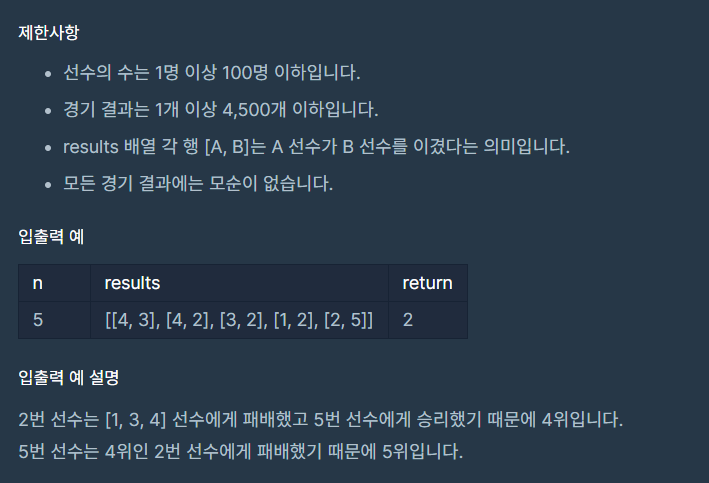

##### 내 답
#### 초기 relation에 반영되지 않는 문제로 인해 같은 for문 반복 수행, 그러나 좋은 방법은 아님

In [74]:
def solution(n, results):
    relation = [ {"up":set(),"down":set()} for _ in range(n+1) ]
    for r in results:
        u,d = r
        relation[u]["down"].add(d)
        relation[d]["up"].add(u)
    for r in results:
        u,d = r
        relation[u]['down'].update(relation[d]['down'])
        relation[d]['up'].update(relation[u]['up'])
    for r in results:
        u,d = r
        relation[u]['down'].update(relation[d]['down'])
        relation[d]['up'].update(relation[u]['up'])
    for r in results:
        u,d = r
        relation[u]['down'].update(relation[d]['down'])
        relation[d]['up'].update(relation[u]['up'])
    count = 0
    for data in relation:
        print(data)
        if len(data["up"])+len(data["down"]) == n-1:
            count+=1
    return count

In [75]:
r = [[4,3],[4,2],[3,2],[1,2],[2,5]]
t = [[1,2],[1,3],[2,4],[3,4]]
ans = solution(5,r)
ans

{'up': set(), 'down': set()}
{'up': set(), 'down': {2, 5}}
{'up': {1, 3, 4}, 'down': {5}}
{'up': {4}, 'down': {2, 5}}
{'up': set(), 'down': {2, 3, 5}}
{'up': {1, 2, 3, 4}, 'down': set()}


2

##### 답안

In [82]:
from collections import defaultdict

def solution(n,results):
    answer = 0
    win = defaultdict(set)
    lose = defaultdict(set)
    
    for a,b in results:
        # win은 키가 value를 이김
        # lose는 키가 value에 짐
        win[a].add(b)
        lose[b].add(a)
    print("win:",win)   
    print("lose:",lose)
    
    for i in range(1,n+1):
        # winner는 i번째 키가 value에 진 것들
        # 그래서 i번째 키가 이긴 value들도 win관계 포함
        for winner in lose[i]: 
            win[winner].update(win[i])    
        for loser in win[i]:
            lose[loser].update(lose[i])
    print()
    print("win:",win)   
    print("lose:",lose)
    for i in range(1,n+1):
        if len(win[i]) + len(lose[i]) == n-1: 
            answer +=1
    return answer

In [83]:
r = [[4,3],[4,2],[3,2],[1,2],[2,5]]
t = [[1,2],[1,3],[2,4],[3,4]]
ans = solution(5,r)
ans

win: defaultdict(<class 'set'>, {4: {2, 3}, 3: {2}, 1: {2}, 2: {5}})
lose: defaultdict(<class 'set'>, {3: {4}, 2: {1, 3, 4}, 5: {2}})

win: defaultdict(<class 'set'>, {4: {2, 3, 5}, 3: {2, 5}, 1: {2, 5}, 2: {5}, 5: set()})
lose: defaultdict(<class 'set'>, {3: {4}, 2: {1, 3, 4}, 5: {1, 2, 3, 4}, 1: set(), 4: set()})


2